1. Intro to Statsmodel Library
2. ETS Decomposition
3. Moving Averages
4. Holt Winters Methods
5. StatsModel Time Series Exercises

# 1. Intro to StatsModel Library

Statsmodel has lot of statistical tests built in. We will learn to call a test function here. Also we'll learn about Hodrick-Prescott filter

## Time Series Concepts

### Trends

1. Upward Trend ------------------> Average Slope is +ve
2. Downward Trend ----------------> Average Slope is -ve
3. Horizontal/Stationary ---------> Not moving up or down

A Time Series can have one or more trends mentioned above.

### Seasonality

Seasonality are nothing but repeating trends.

### Cyclical

Cyclical behaviour is when there are trends but with no set repetition.

## Hodrick-Prescott Filter

HP filter tries to separate a time series into a trend component and a cyclical component.

---------> y_t = T_t + C_t

Quadratic equation is any formula which can be rearranged in form of f(x) = ax^2 + bx + c. They are polynomial equations of degree 2.

Smoothing is a technique applied to time series to remove the fine-grained variation between time steps. The hope of smoothing is to remove noise and better expose the signal of the underlying causal processes. Smoothing data removes random variation and shows trends and cyclic components.

The components T_t and C_t are determined by minimizing a quadratic loss function with Lambda as smoothing parameter.

Default values to use for Lambda are

* Quarterly Data - 1600
* Annual Data    - 6.25
* Monthly data   - 129,600

Import Libraries

In [81]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

Read dataset which contains some macro economic data

In [5]:
df = pd.read_csv('Data/macrodata.csv',index_col=0, parse_dates=True)

In [6]:
df.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


We have quarterly data

Plot the realgdp variable

Text(0, 0.5, 'GDP')

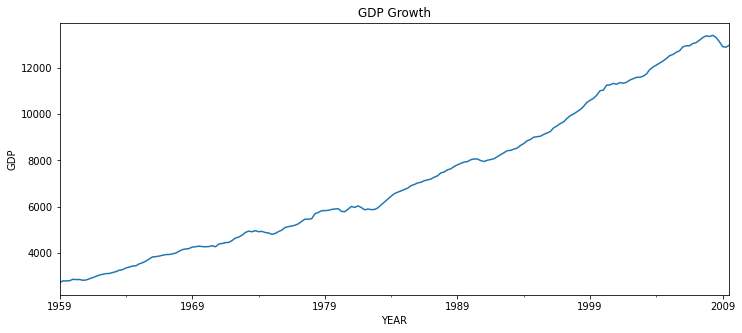

In [12]:
ax = df['realgdp'].plot(figsize=(12,5), title='GDP Growth');
ax.set_xlabel('YEAR')
ax.set_ylabel('GDP')

Import tsa modules' hpfilter function from statsmodel

In [13]:
from statsmodels.tsa.filters.hp_filter import hpfilterfilter

Pass realgdp data to the hpfilter with lambda of 1600 because of quarterly data. the function returns a tuple so use tuple unpacking to get cyclic and trend components

In [14]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'],lamb=1600)

In [18]:
type(gdp_trend)

pandas.core.series.Series

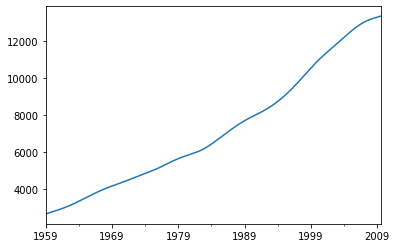

In [20]:
gdp_trend.plot();

Now plot the original series with its trend component on top of each other

In [ ]:
df_gdp = df[['realgdp']]
df_gdp['trend'] = gdp_trend

In [29]:
df_gdp.head(5)

,realgdp,trend
1959-03-31,2710.349,2670.837085
1959-06-30,2778.801,2698.712468
1959-09-30,2775.488,2726.612545
1959-12-31,2785.204,2754.612067
1960-03-31,2847.699,2782.816333


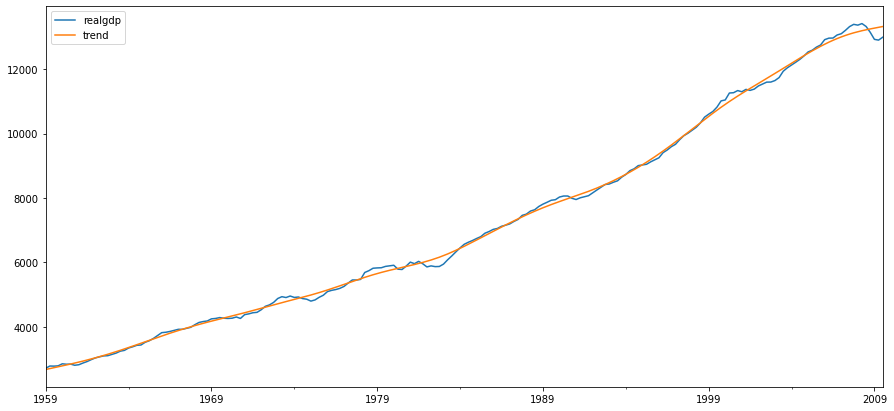

In [32]:
df_gdp.plot(figsize=(15,7));

Look at difference between realgdp and trend around the 2008 recession period. Slice df using datetime index.

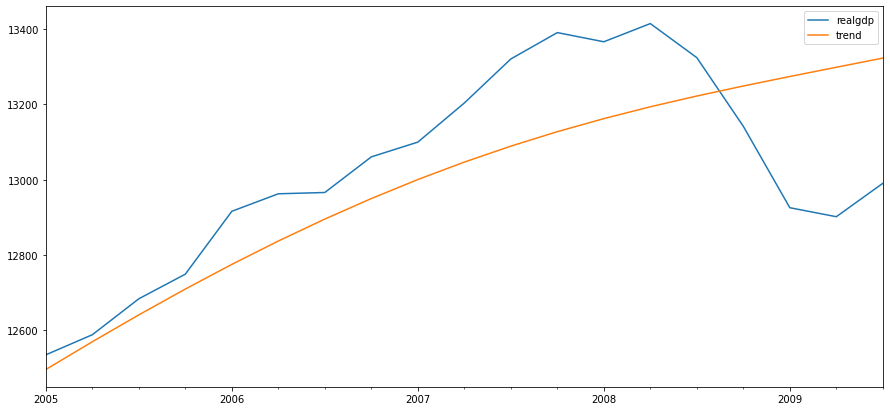

In [33]:
df_gdp['2005-01-01':].plot(figsize=(15,7));

# 2. ETS Decomposition

## ETS MODELS - ETS stands for Error-Trend-Seasonality

ETS models have many models out of which ETS decomposition is one of the use case which we will be seeing  now.

* Exponential Smoothing
* Trend Methods Models
* ETS Decomposition

ETS models will take each of the E , T and S components and add or multiply or even leave some components out to produce a generalized model that fits our data.

To understand the general behaviour of a time series, we can do ETS decomposition and visualize each of the E,T,S components.

For example, we can consider a classical time series dataset of Airline Passengers count data and try to visualize it.

In [58]:
df_ap = pd.read_csv('Data/airline_passengers.csv', index_col='Month', parse_dates=True)
#We can have missing values, so drop them since we can't have those fwhile performing ETS decomposition
df_ap = df_ap.dropna()

In [59]:
df_ap.head(5)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

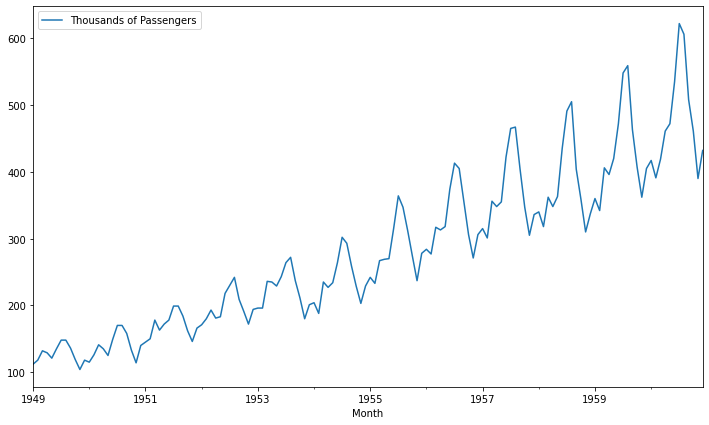

In [60]:
df_ap.plot(figsize=(12,7))

In the above plot, we could observe both a trend and a seasonality. but, trends can be linear or exponential. Here from first glance, we are not sure whether the trend is linear or exponential because of the seasonality interferance. So ETS decomposition could give a clearer understanding of the behaviour of this TS.

Import ETS or seasonal decompose from TSA module

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose

There are 2 types of ETS decomposition models, additive and multiplicative. So pass the time series to the function and mention which model you need.

We apply an additive model when it seems that the trend is more linear and T & S components seem to be constant over time.

We apply a multiplicative model when trend is increasing or decreasing at non-linear rate.

In [66]:
ets_results = seasonal_decompose(df_ap['Thousands of Passengers'],model='multiplicative')

Set the default RcParams for your notebook to increase figsize

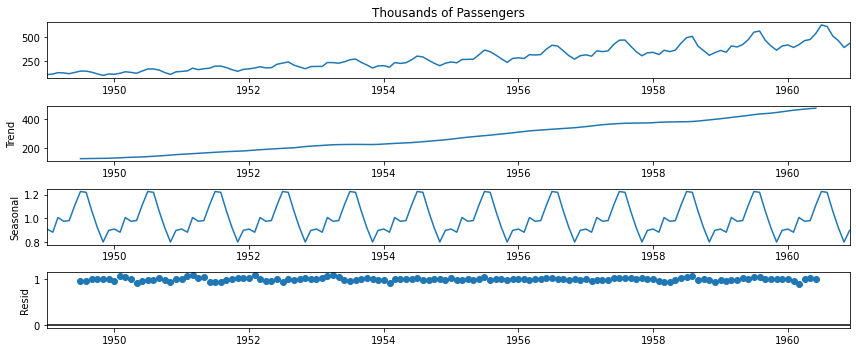

In [68]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
ets_results.plot();

Plot residuals separately using pandas plot

<AxesSubplot:xlabel='Month'>

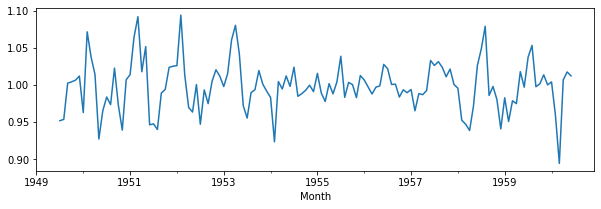

In [72]:
ets_results.resid.plot(figsize=(10,3))

# 3. Moving Averages - EWMA models

EWMA - Exponentially Weighted Moving Average

SMA- Simple Moving Averages allow us to create a simple model which can show you a little bit of trend behaviour of time series by smoothing.

We have more sophisticated model like ARIMA but even SMA can be used to create a generalized model to model any real-time time series data.

Build a SMA model plot for Airline Passengers Dataset with rolling windows 6 and 12 months.

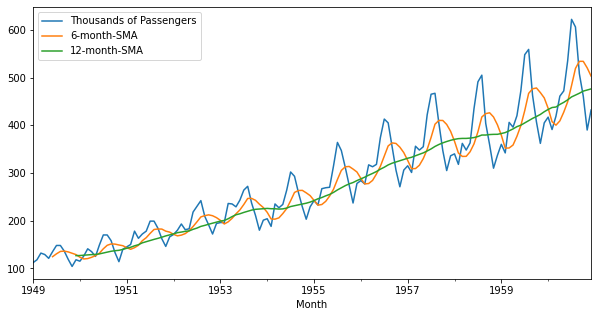

In [80]:
df_ap['Thousands of Passengers'].plot(figsize=(10,5))
df_ap['Thousands of Passengers'].rolling(window=6).mean().plot()
ax = df_ap['Thousands of Passengers'].rolling(window=12).mean().plot()
ax.legend(['Thousands of Passengers','6-month-SMA','12-month-SMA'])

An issue with SMA models is that the entire model will be constrained to the same window size. So, it would be nice if more recent data can be weighted more than older data.

SMA weaknesses include

* Smaller window size leading to modelling noise rather than signal
* Always lag by the window size
* Never reach full peak or valley due to averaging
* does not really inform you about possible future behaviour, all it does is describe trend in your data.

EWMA reduces lag and puts more weight on recent values.

EWMA implementation

In [82]:
#Freshly read airline data again
airline = pd.read_csv('Data/airline_passengers.csv', index_col='Month')
airline.dropna(inplace=True)
airline.index = pd.to_datetime(airline.index)

In [83]:
airline.head(5)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


SMA

<AxesSubplot:xlabel='Month'>

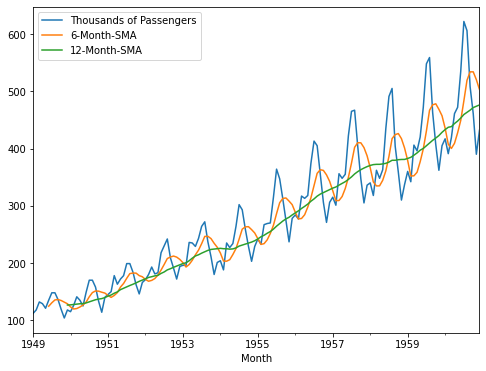

In [86]:
airline['6-Month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-Month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

airline.plot(figsize=(8,6))

## EWMA

In [87]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

<AxesSubplot:xlabel='Month'>

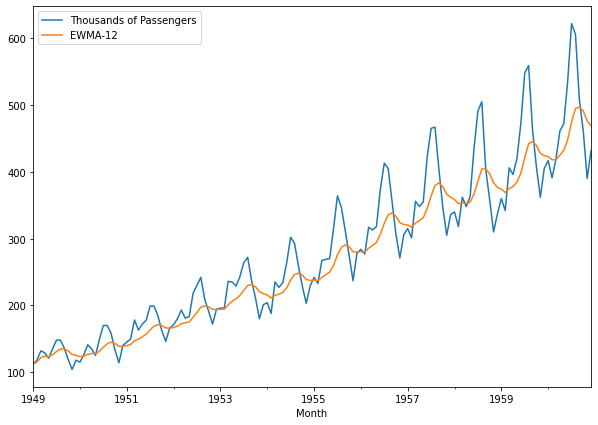

In [90]:
airline[['Thousands of Passengers','EWMA-12']].plot(figsize=(10,7))

How is EWMA calculated? Full math check out https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#exponentially-weighted-windows

* Span corresponds to what is commonly called an “N-day EW moving average”.
* Center of mass has a more physical interpretation and can be thought of in terms of span:  𝑐=(𝑠−1)/2 
* Half-life is the period of time for the exponential weight to reduce to one half.
* Alpha specifies the smoothing factor directly.

We have to pass precisely one of the above into the .ewm() function. For our data we'll use span=12

# 4. Holt Winters Method

Simple Exponential Smoothing had only one smoothing factor alpha. And doesn't account for seasonality.

Holt Winters is better than EMWA. Here we won't use HWM for forecasting yet, we'll just see the theory and how to fit HWM model to a time series data.

HOLT in 1957 came up with a double exponential smoothing method and WINTERS extended it to capture seasonality(Triple Exponential Smoothing).

The HOLT-WINTERS seasonal method comprises of the forecaset equation and three smoothing equations.

Three components according to HWM are level, trend, seasonality. l_t, b_t, c_t with corresponding smoothing parameters alpha, beta and gamma.

Two variations of HWM are additive and multiplicative. Additive is preferred when seasonal variations are roughly constant through the series and multiplicative is preferred when seasonal variations are changing proportional to the level of the series.

### Holts Forecasting Equation
y_(t+h) = l_t + h*b_t

Level and Trend components

### Holt Winters Method

<img src="Holt-Winters Method.JPG">

### Implement Holt Winters Method

In [91]:
df = pd.read_csv('Data/airline_passengers.csv', index_col='Month', parse_dates=True)

In [92]:
df = df.dropna()

In [93]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

### Setting a DatetimeIndex Frequency
Note that our DatetimeIndex does not have a frequency. In order to build a Holt-Winters smoothing model, statsmodels needs to know the frequency of the data (whether it's daily, monthly etc.). Since observations occur at the start of each month, we'll use MS.<br>A full list of time series offset aliases can be found <a href='http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases'>here</a>.

In [95]:
df.index.freq = 'MS' # String code or Offset aliases for Pandas Time Series. MS-Month Start Frequency.
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [96]:
df.head(5)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Fitting a model to Time Series Data ----> SMA(Simple Moving Average) < SES(EWMA-Simple Exponential Smoothing) < Holt(Double Exponential Smoothing) < Holt-Winter(Triple Exponential Smoothing)

Import Simple Exponential Smoothing Model

In [97]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

<img src='EWMA alpha formula.JPG'>

### Manually Create EWMA model and then use SimpleExpSmoothing function to do it
Choose span as 12 because we have monthly data and 12 months in a year.

In [102]:
span = 12
alpha = 2/(span+1)

adjust : bool, default True
    Divide by decaying adjustment factor in beginning periods to account
    for imbalance in relative weightings (viewing EWMA as a moving average).

    - When ``adjust=True`` (default), the EW function is calculated using weights
      :math:`w_i = (1 - \alpha)^i`. For example, the EW moving average of the series
      [:math:`x_0, x_1, ..., x_t`] would be:

    .. math::
        y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ... + (1 -
        \alpha)^t x_0}{1 + (1 - \alpha) + (1 - \alpha)^2 + ... + (1 - \alpha)^t}

    - When ``adjust=False``, the exponentially weighted function is calculated
      recursively:
      
      .. math::
        \begin{split}
            y_0 &= x_0\\
            y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,
        \end{split}

In [103]:
df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()

In [104]:
df.head(5)

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


Create a model and Fit. Smoothing_level is just alpha value.

In [105]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])

In [109]:
fitted_model = model.fit(smoothing_level=alpha, optimized=False) # This will create first 2 values to be duplicated.
#So shift by 1

In [111]:
df['SES12'] = fitted_model.fittedvalues.shift(-1)

In [112]:
df.head(5)

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


### Double Exponential Smoothing or Holt Method

In [113]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

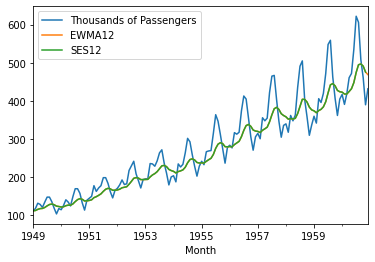

In [114]:
df.plot();

Note that if the trend line seems to be linear, we go for additive model and if it is exponential we go for multiplicative model.

Create a additive holt model with window/span of 12. Remember frequency already set at index level so span not needed. Optionally just specify seasonal_periods parameter if needed.

In [115]:
df['DES_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)

In [116]:
df.head(5)

,Thousands of Passengers,EWMA12,SES12,DES_add_12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.237773
1949-02-01,118,112.923077,112.923077,120.237773
1949-03-01,132,115.857988,115.857988,134.237773
1949-04-01,129,117.879836,117.879836,131.237773
1949-05-01,121,118.359861,118.359861,123.237773


In [117]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_add_12'], dtype='object')

<AxesSubplot:xlabel='Month'>

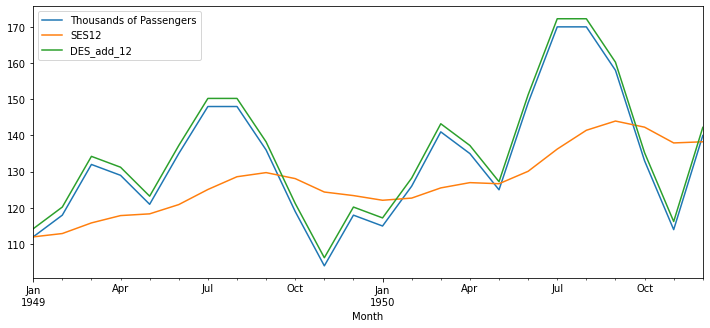

In [123]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12']].iloc[:24].plot(figsize=(12,5))

As we can see, just adding an additional smoothing parameter improved our model so well to fit the actual time series.
It is just a generalized formula which is able to model this data. We had to zoom in to first 2 years(24 periods/months) to see the actual difference between original plot and DES line.

Since this dataset was tough to determine whether the trend was liner or exponential we will try both model additive and multiplicative

<AxesSubplot:xlabel='Month'>

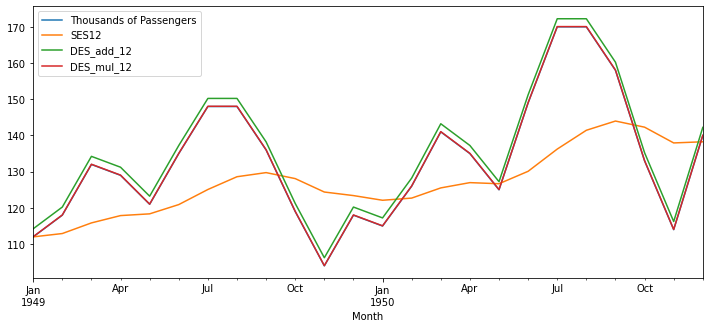

In [125]:
df['DES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)
df[['Thousands of Passengers', 'SES12', 'DES_add_12','DES_mul_12']].iloc[:24].plot(figsize=(12,5))

We conclude that we should have been using multiplicative model since, it fits the blue(original) line so well than additive model.

### Triple Exponential Smoothing (Holt-Winters Method)

Here we need to decide whether seasonal component should be additive or multiplicative. Usually people try out all possible combition and evaluate using some metric during forecasting.

Additive is preferred when seasonal variations are roughly constant through the series and multiplicative is preferred when seasonal variations are changing proportional to the level of the series.

In [127]:
df['TES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul',
                                       seasonal_periods=12).fit().fittedvalues

In [129]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_add_12',
       'DES_mul_12', 'TES_mul_12'],
      dtype='object')

<AxesSubplot:xlabel='Month'>

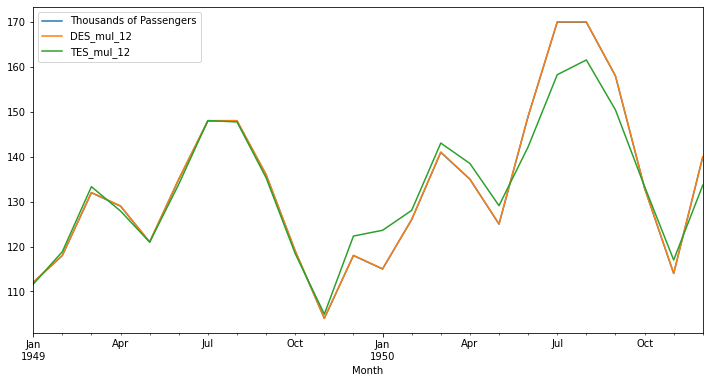

In [131]:
df[['Thousands of Passengers','DES_mul_12', 'TES_mul_12']].iloc[:24].plot(figsize=(12,6))

Here we might conclude that DES performs better than TES since green line misses blue line. For initial periods, simpler models might perform better, but, for forecasting TES performs better than simpler models.